# PROYECTO1-ETAPA1

**INTEGRANTES**
- Juan Sebastian Sanchez Delgado - 202013577
- Miguel Angel Cardenas - 202010998
- Santiago Paeres Gonzalez - 201425176

## 1. Entendimiento y preparacion de los datos


In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Descargando stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_ods = pd.read_csv("./cat_345.csv", sep=';', encoding = 'utf8')

In [6]:
df_ods.shape

(3000, 2)

In [7]:
df_ods.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [8]:
df_ods.sample(5)

,Textos_espanol,sdg
769,"Como se muestra, la población islandesa ha exp...",3
2073,Si bien muchas de ellas prevÃ©n la igualdad de...,5
97,Anteriormente denominado Instituto de Salud Pú...,3
925,"Ciencias Sociales y Medicina, 68(8), 1396-1406...",3
890,"Sin embargo, la Colaboración Nacional para la ...",3


### 1.1 Completitud

In [9]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_ods.isnull().sum() / df_ods.shape[0]

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [10]:
# Cálculo de porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

### 1.2 Unicidad

In [11]:
# Se revisa el numero de filas duplicadas
df_ods.duplicated(keep = False).sum()

0

### 1.3 Consistencia

In [12]:
df_ods["Textos_espanol"] = df_ods["Textos_espanol"].astype(str)

### 1.4 Validez

In [13]:
df_ods['sdg'].value_counts()

sdg
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [14]:
df_ods['Textos_espanol'].value_counts()

Textos_espanol
Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.                                         

In [15]:
df_ods.sample(20)

,Textos_espanol,sdg
1667,El objetivo es colaborar más estrechamente con...,4
920,"Por lo tanto, la proporción de pacientes que v...",3
1339,"Para garantizar la calidad de la EAPI, el pers...",4
2090,Garantizar la libertad de las mujeres para par...,5
577,También es motivo de preocupación la suspensió...,3
35,También consideramos cómo se puede desarrollar...,3
2675,"Sin embargo, las diferencias de ingresos no so...",5
444,La promoción y el suministro y distribución fi...,3
586,Nota: Porcentaje estimado de adultos (de 15 a ...,3
486,Los intentos de planificación entre gobiernos ...,3


In [16]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
10,Dos encuestados seÃ±alaron que no existe un or...,3
26,"También promueve mejoras en la prevención, el ...",3
30,La falta de programas completos de acreditació...,3
46,Dado el aumento de enfermedades crónicas como ...,3
...,...,...
2984,Las actividades empresariales siguen viéndose ...,5
2990,La Agenda Nacional de Jordania 2006-15 estable...,5
2991,"En la mayoría de los países de la CAO, los fun...",5
2996,"Por el contrario, el porcentaje de hogares en ...",5


In [17]:
# Remplaza lo caracteres erroneos con su equivalencia pero en UTF-8
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã©', 'é')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã', 'í')

In [18]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg


In [19]:
df_ods.sample(10)

,Textos_espanol,sdg
1007,Hay una disponibilidad cada vez mayor de datos...,4
962,El objetivo es mejorar la salud reproductiva y...,3
1222,"Por lo tanto, los docentes y el liderazgo admi...",4
1940,"Sin embargo, la participación y los logros en ...",4
1947,"Como tal, la educación juega un papel cívico i...",4
2951,"En muchos casos, las consecuencias económicas ...",5
1801,Los aumentos recientes han puesto los salarios...,4
2304,En el caso de las mujeres se observan tendenci...,5
2876,La sección C analiza por qué la igualdad de gé...,5
318,"Además, como se ha comentado en la sección ant...",3


### 1.5 Transformacion

In [20]:
# Se dividen los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_ods["Textos_espanol"], df_ods["sdg"], test_size=0.3, stratify=df_ods["sdg"], random_state=1)

In [21]:
X_train.shape, X_test.shape

((2100,), (900,))

In [22]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

In [23]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [24]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15134


In [27]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [28]:
X_tfidf = tfidf.fit_transform(X_train)

In [29]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15134


## 2. Modelado y evaluacion

### 2.1 Entrenando Modelo con BoW y Random Forest classifier (Juan Sebastian Sanchez Delgado)

In [30]:
bow_model = RandomForestClassifier(random_state=2)

In [31]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

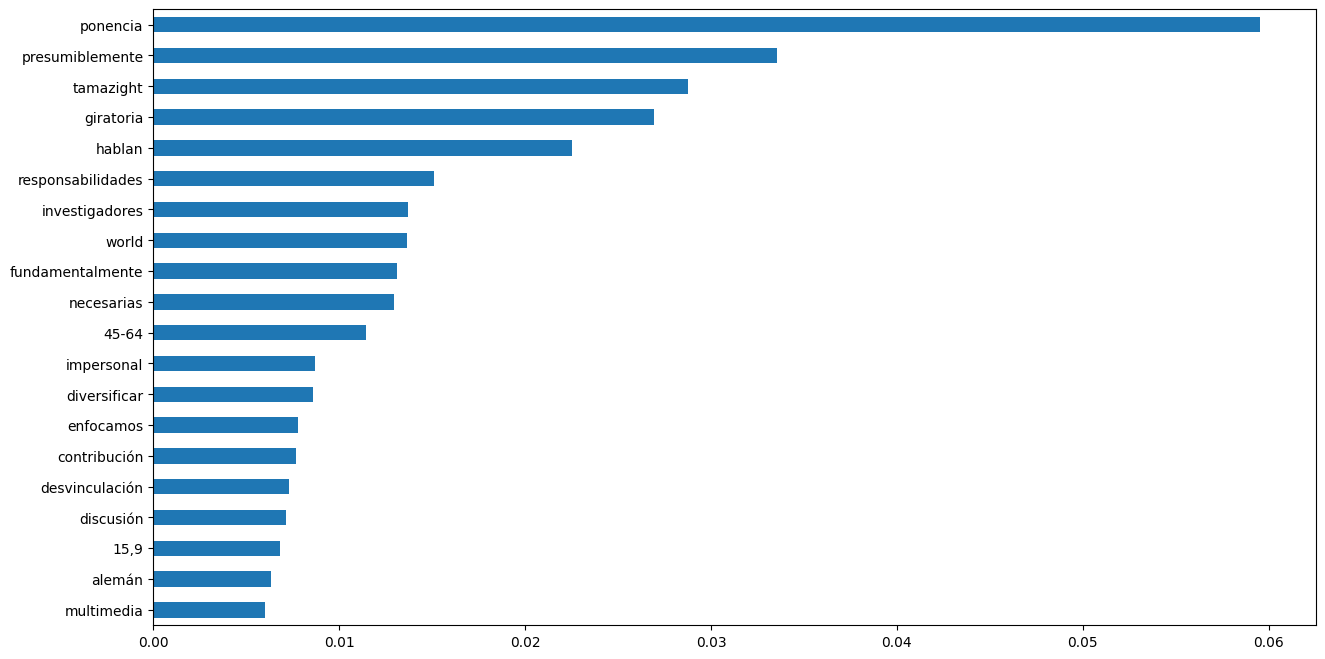

In [32]:
# Se muestra la importancia de algunas palabras para determinar que tan relevante es para tomar una decision para el modelo
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [33]:
bow_estimators = bow_model.estimators_
print("Numero de arboles de decision:", len(bow_estimators))
print("Profundidad de los arboles (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Numero de arboles de decision: 100
Profundidad de los arboles (mean): 97.14


In [34]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

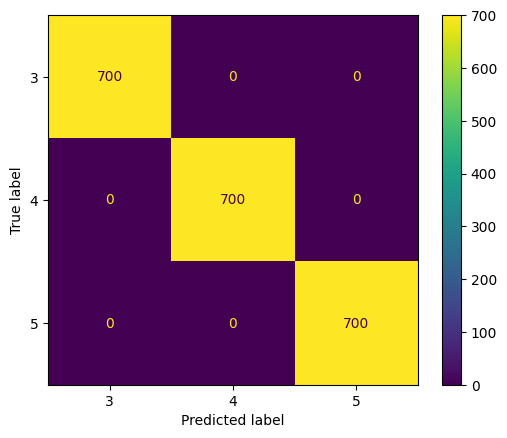

In [35]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

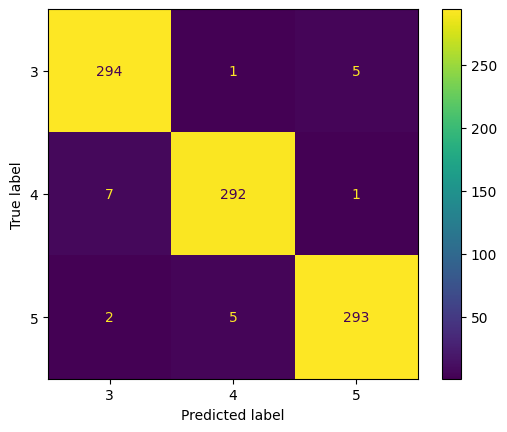

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [37]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [38]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9766666666666667
Recall: 0.9766666666666667
F1: 0.9766666666666667


### 2.2 Entrenando modelo con TF-IDF (Santiago Paeres Gonzalez)

In [38]:
tfidf_model = RandomForestClassifier(random_state=3)

In [39]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

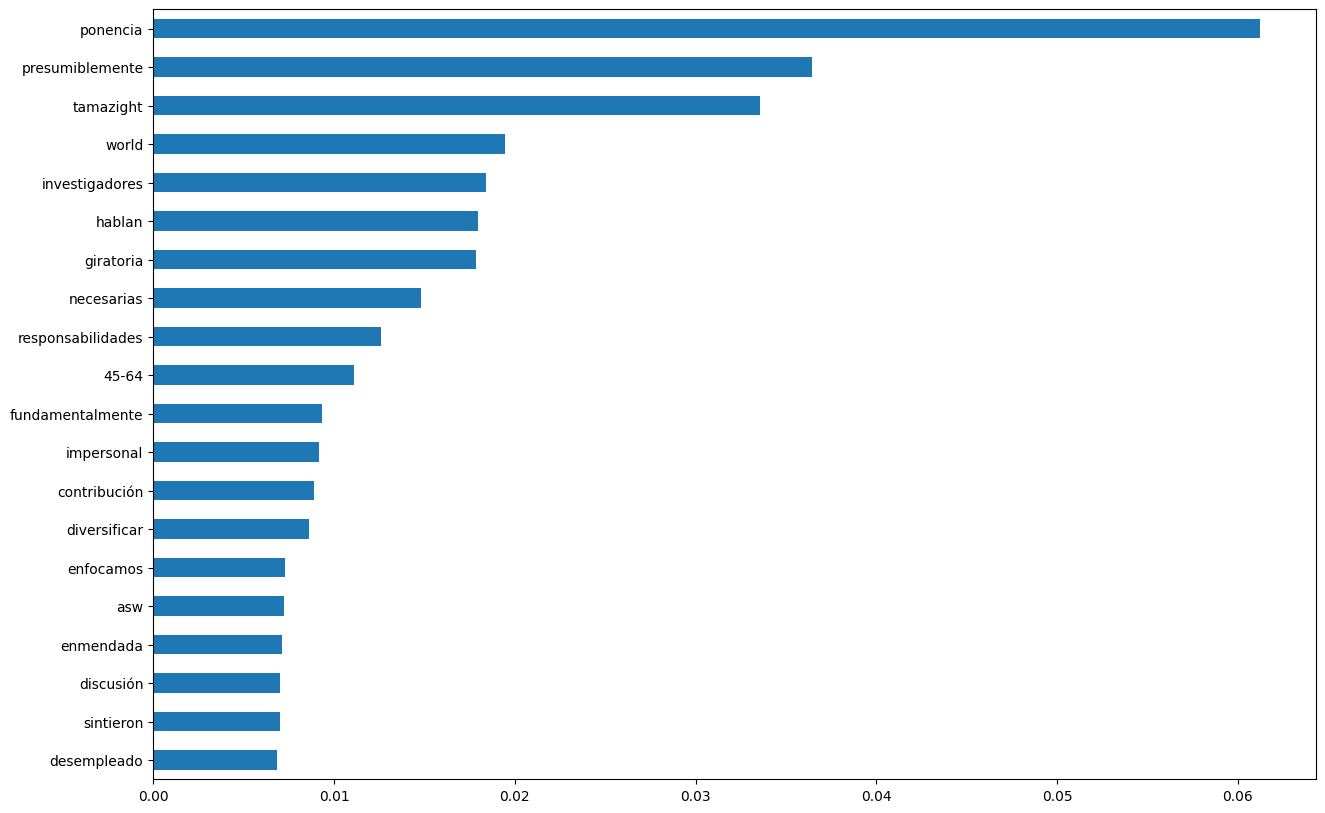

In [40]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [41]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.28


In [42]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

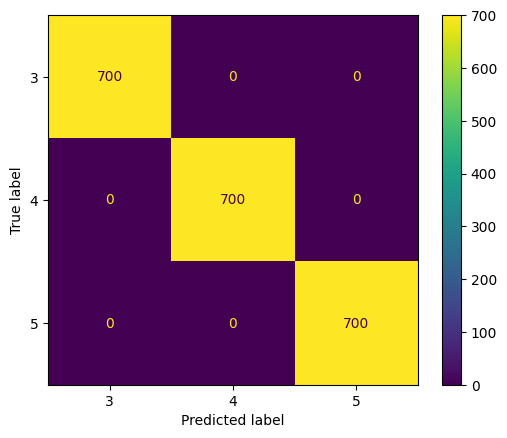

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

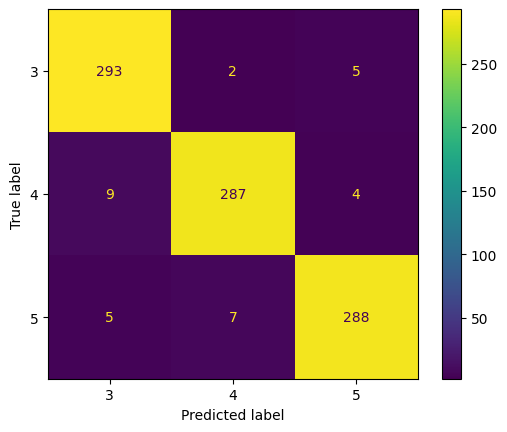

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [45]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [46]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.9644444444444444
Recall: 0.9644444444444444
F1: 0.9644444444444444


### Model selection

In [47]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [48]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [30, 50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}

In [49]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=15, scoring=["precision", "recall", "f1"], refit="f1", cv=30, return_train_score=True, verbose=1, random_state=5)

In [50]:
search.fit(X_train, y_train)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


: 

In [ ]:
search.best_params_

{'vectorizer__lowercase': True,
 'vectorizer': TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fe9f35191f0>),
 'classifier__n_estimators': 50,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [ ]:
search.best_score_

nan

In [ ]:
y_train_search_predict = search.best_estimator_.predict(X_train)
y_test_search_predict = search.best_estimator_.predict(X_test)

In [ ]:
print("Precision:", precision_score(y_train, y_train_search_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_search_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_search_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [ ]:
print("Precision:", precision_score(y_test, y_test_search_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_search_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_search_predict, average='micro'))

Precision: 0.9644444444444444
Recall: 0.9644444444444444
F1: 0.9644444444444444


### 2.3 Entrenando modelo con Gradient Boosting (Miguel Angel Cardenas) 

In [39]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [40]:
gb_classifier.fit(X_bow, y_train)

GradientBoostingClassifier(random_state=42)

<Axes: >

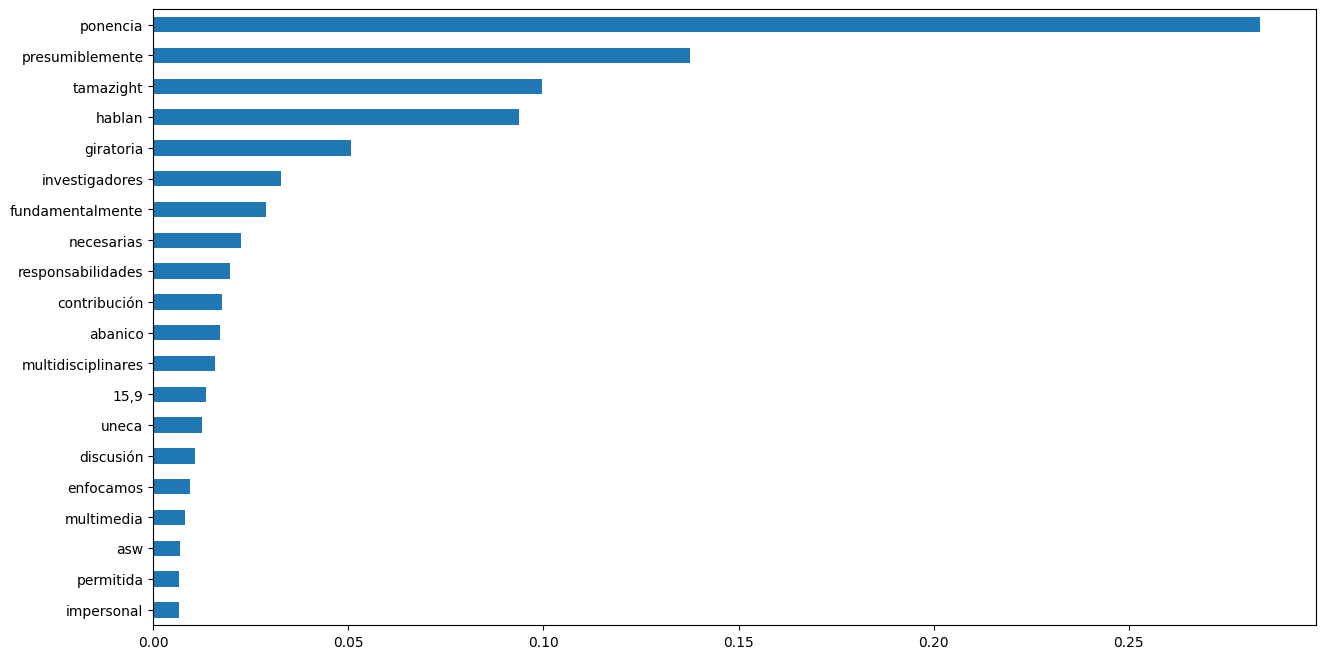

In [41]:
pd.Series(gb_classifier.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [42]:
gb_estimators = gb_classifier.estimators_

# Imprime el número de árboles
print("Número de árboles de decisión:", len(gb_estimators))

# Calcula la profundidad promedio de los árboles
depths = [tree[0].tree_.max_depth for tree in gb_estimators]
print("Profundidad de los árboles (media):", np.mean(depths))

Número de árboles de decisión: 100
Profundidad de los árboles (media): 3.0


In [43]:
y_train_gb_predict = gb_classifier.predict(X_bow)

# Realiza predicciones en el conjunto de prueba
y_test_gb_predict = gb_classifier.predict(bow.transform(X_test))

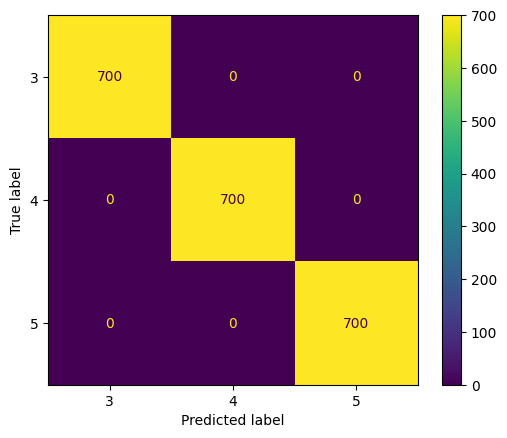

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gb_predict)

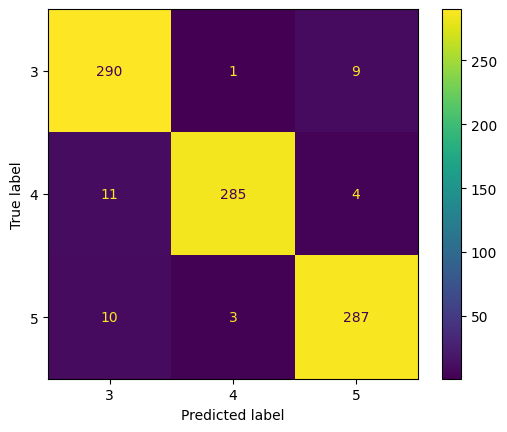

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_gb_predict)

In [46]:
print("Precision:", precision_score(y_train, y_train_gb_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_gb_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_gb_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [47]:
print("Precision:", precision_score(y_test, y_test_gb_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_gb_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_gb_predict, average='micro'))

Precision: 0.9577777777777777
Recall: 0.9577777777777777
F1: 0.9577777777777777


## 3. Resultados